#Import (ignore)

In [714]:
import numpy as np
import pandas as pd

# Plot
from matplotlib import pyplot as plt
import seaborn as sn

# Features Selection
from sklearn.ensemble import ExtraTreesClassifier

# Split Sataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# K-Fold Cross Validation
from sklearn import model_selection

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Tune Hyperparameters
from sklearn.model_selection import GridSearchCV

# M.L. Report
from sklearn.metrics import accuracy_score , classification_report

In [715]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [716]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT_Heart/heart.csv')

In [717]:
#Classification report of the dataset with duplicate observations
classification_report_duplicated_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT_Heart/classification_report_duplicated_data.csv',index_col='index')
classification_report_duplicated_data

,precision,recall,f1_score,support
index,,,,
0,1.0,1.0,1.0,96
1,1.0,1.0,1.0,109
accuracy,NaN,NaN,1.0,205
macro_avg,1.0,1.0,1.0,205
weighted_avg,1.0,1.0,1.0,205


In [718]:
final_score_duplicated_data = [0.8329268292682928, 0.9853658536585366, 0.9878048780487806, 0.9365853658536587, 0.9890243902439024, 0.8073170731707318]

# **Abstract**

In recent years, the importance of artificial intelligence, combined with iot devices in the healthcare sector, has been growing. In fact, the use of a digital twin offers an innovative approach in this area and, when used as a monitoring system, can be helpful in determining the medical condition of patients and facilitating quicker decision-making.

The purpose of this paper is to establish the basis for a Machine Learning model that is capable of recognizing people with heart issues and can then be utilized in a Digital Twin in the health care sector.

# **Introduction**
The dataset used to train the Machine Learning algorithms was taken from Keggle and is the most widely used dataset in the context of Heart Disease. Duplicate observations were first removed because there were not one in the original database from which the Keggle dataset was created.

Data Preprocessing and Data Visualization steps were performed, in order to adjust the dataset and to acquire a knowledge of the distributions and correlations of the features.


Six classification algorithms were selected: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Machines, K-Neighbors Classifier e Naive Bayes.

The dataset was split into a train set and test set (partitioning: 80-20), the train set was used to develop the models while the test set was used to evaluate the model's efficiency at its final stage.



The k-fold cross validation, a resampling technique, was used to train the Machine Learning models. After the models were trained, Tune Hyperparameters was used to identify the best model parameters in order to enhance their performance.

The training of Machine Learning models was performed on two different datasets.
- Full Dataset: Dataset containing 10 out of 13 features
- Reduced Dataset: is a reduced dataset containing the 4 features used in the digital twin.

The features that will constitute the Full Dataset were chosen using the Extra Trees Classifier, a classification algorithm that is frequently employed in feature selection.


Finally, various metrics were calculated and compared in order to evaluate the performance of the models (differentiating between the two datasets). A comparison with the models produced in the absence of any preliminary data cleaning for duplicates is also included.

#**Dataset**
The dataset considered was taken from Kaggle, it is one of the most widely used datesets in the field of heart disease.

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.




| Features | Description | Possible values |
| --- | --- | --- |
| age |  |  |
| sex |  | 1 = Male, 0 = Female |
| cp | chest pain type | 0 = Typical Angina 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic |
| trestbps | resting blood pressure, mmHg |  |
| chol | serum cholestoral in mg/dl |  |
| fbs | fasting blood sugar > 120 mg/dl | 0 = False, 1 = True |
| restecg | resting electrocardiographic results | 0 = Normal, 1 = ST-T Wave Abnormality, 2 = Showing probable or definite left ventricular hypertrophy |
| thalach | maximum heart rate achieve |  |
| exang | exercise induced angina | 1 = Yes, 0 = No |
| oldpeak | ST depression induced by exercise relative to rest |  |
| slope	 | The slope of the peak exercise ST segment | 0 = Upsloping, 2 = Flat, 3 = Downsloping |
| ca | number of major vessels (0-3) colored by flourosopy |  |
| thal | A blood disorder known as thalassaemia | 3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect |
| target | The patient has a heart disease | 0 = No, 1 = Yes |

        

trestbps: The optimal blood pressure level is a reading under 120/80 mmHg. A reading that is higher would be considered elevated or high.

chol: The desirable cholesterol level for adults is less than 200 mg/dl.
        
      
        




#**Data Preprocessing**

## Rename features

In [719]:
data.columns = ['age', 'sex', 'chest_pain', 'rest_blood_pressure', 'cholesterol', 'fast_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassaemia', 'target']
data

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassaemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


##Remove duplicate observation

As can be seen, the dataset contains a large number of duplicate observations.

These duplicate observations are not in the original "Heart Disease (1988)" database, so the first thing to do is to go and delete the duplicate observations.
Duplicate observations are a big problem in the field of Machine Learning as they introduce bias and have an impact on the final model.

In another document (IoT Heart - M.L. with duplicated), the same Machine Learning algorithms done here have been developed, so that the impact they have can be compare.




In [720]:
print("There are {} duplicated observations to be remove.".format(len(data[data.duplicated()])))
data.drop_duplicates(keep = 'first', inplace = True)
print("The new dataset will consist of {} observations.".format(len(data.index)))

There are 723 duplicated observations to be remove.
The new dataset will consist of 302 observations.


In [721]:
data

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassaemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Features type

In [722]:
data.dtypes

age                          int64
sex                          int64
chest_pain                   int64
rest_blood_pressure          int64
cholesterol                  int64
fast_blood_sugar             int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassaemia                 int64
target                       int64
dtype: object

##Looking for null values

In [723]:
#check for null value in dataset
data.isnull().sum()

age                        0
sex                        0
chest_pain                 0
rest_blood_pressure        0
cholesterol                0
fast_blood_sugar           0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassaemia               0
target                     0
dtype: int64

# **Data Visualization**

## Statistical info

In [724]:
#Statistical info
data.describe()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassaemia,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Distribution

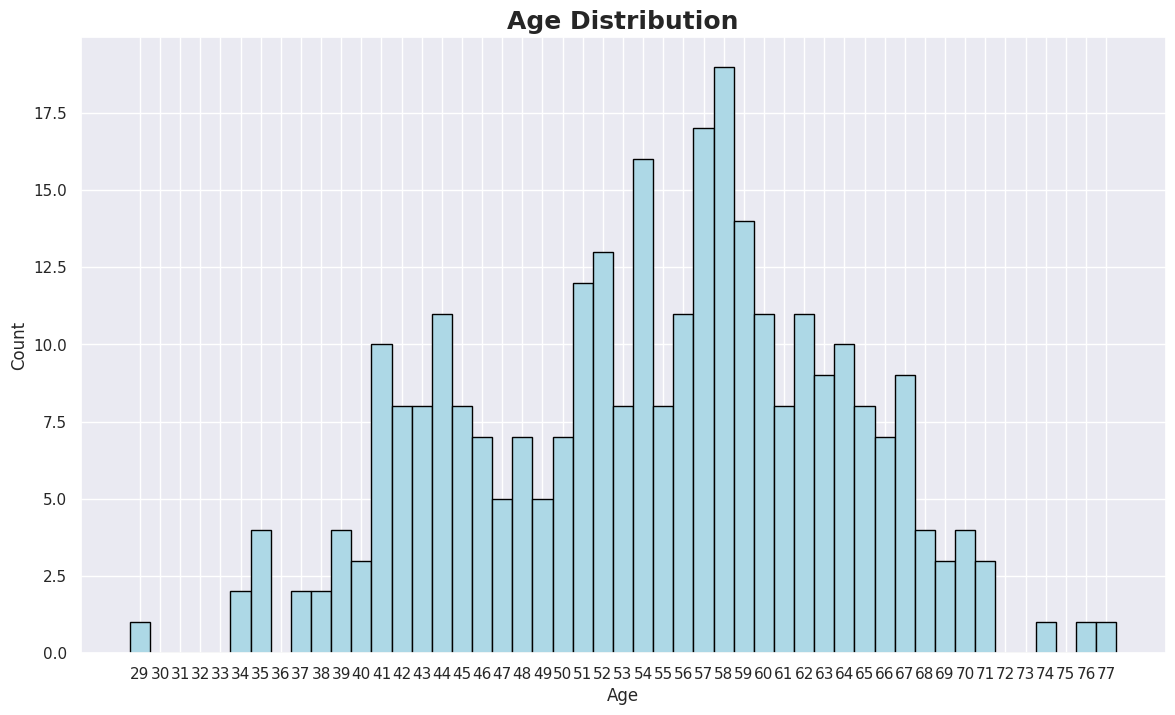

In [725]:
plt.figure(figsize=(14,8))
sn.set(style="darkgrid")

plt.title('Age Distribution', fontsize = 18, weight='bold')
plt.xlabel('Age')
plt.ylabel('Count')

plt.hist(data.age,edgecolor='black', color = "lightblue", bins=np.arange(min(data.age)-0.5, max(data.age)+1.5, 1.0))
plt.xticks(np.arange(min(data.age), max(data.age)+1, 1.0))

plt.show()

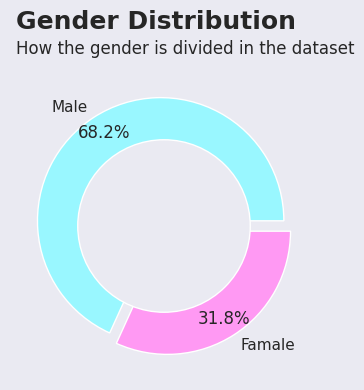

In [726]:

# Setting size in Chart based on
# given values
male = len(data[data.sex == 1])
famale = len(data[data.sex == 0])
sizes = [male,famale]

# Setting labels for items in Chart
labels = ['Male', 'Famale']

# colors
colors = ['#99f7ff','#ff99f3']

# explosion
explode = (0.05, 0.05)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='#eaeaf2')
fig = plt.gcf()
fig.set_facecolor("#eaeaf2")
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.text(-1.2, 1.6, 'Gender Distribution', fontsize = 18, weight='bold')
plt.text(-1.2, 1.4, 'How the gender is divided in the dataset', fontsize = 12)

# Displaying Chart
plt.show()

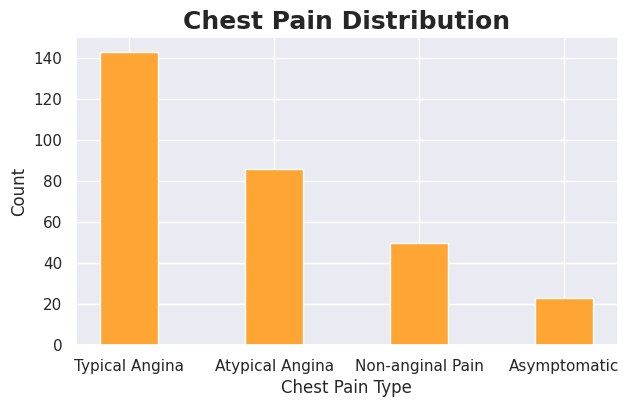

    Chest Pain Type  Count
0    Typical Angina    143
1   Atypical Angina     86
2  Non-anginal Pain     50
3      Asymptomatic     23


In [727]:
cp_lable = ['Typical Angina','Atypical Angina','Non-anginal Pain','Asymptomatic']
cp_values = data.chest_pain.value_counts().values.tolist()
table_cp = pd.DataFrame(list(zip(cp_lable,cp_values)), columns=['Chest Pain Type', 'Count'])


plt.bar(cp_lable, cp_values, color ='#ffa533',
        width = 0.4)
sn.set(style="darkgrid")

plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Chest Pain Distribution", fontsize = 18, weight='bold')
plt.show()

print(table_cp)

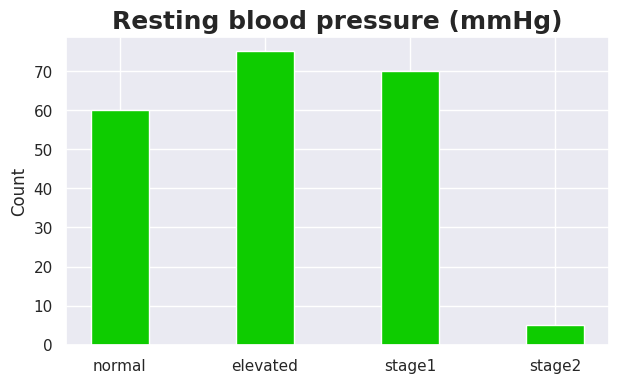

In [728]:
normal = len(data[data.rest_blood_pressure < 120])
elevated = len(data[data.rest_blood_pressure.between(120,129)])
stage1 = len(data[data.rest_blood_pressure.between(130,139)])
stage2 = len(data[data.rest_blood_pressure >= 180])

trestbps_lable=['normal','elevated','stage1','stage2']
trestbps_value = [normal,elevated,stage1,stage2]

plt.bar(trestbps_lable, trestbps_value, color ='#0ecc00',
        width = 0.4)
sn.set(style="darkgrid")


plt.ylabel("Count")
plt.title("Resting blood pressure (mmHg)", fontsize = 18, weight='bold')
plt.show()

**Resting blood pressure (mmHg)**

| Blood Pressure Category	| Systolic Blood Pressure |  |		Diastolic Blood Pressure |
 | --- | --- |--- | --- |
|Normal |	<120 mmHg |	and |	<80 mmHg |
|Elevated |	120-129 mmHg |	and |	<80 mmHg |
|**Hypertension**
  |Stage 1 |	130-139 mmHg |	or |	80-89 mmHg |
  |Stage 2 |	≥140 mmHg |	or |	≥90 mmHg |

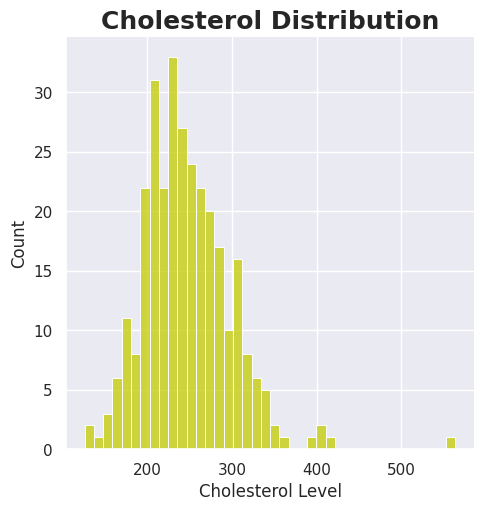

In [729]:
sn.displot(data.cholesterol, kde=False, bins=40, color="#c3cc00")
sn.set(style="darkgrid")

plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.title("Cholesterol Distribution", fontsize = 18, weight='bold')
plt.show()

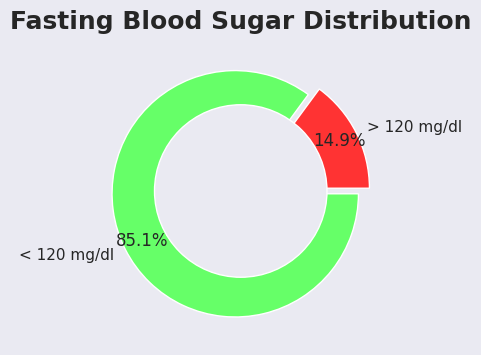

,F.B.S.,Count
0,> 120 mg/dl,45
1,< 120 mg/dl,257


In [730]:

# Setting size in Chart based on
# given values
less = len(data[data.fast_blood_sugar == 1])
more = len(data[data.fast_blood_sugar == 0])
sizes = [less,more]

# Setting labels for items in Chart
labels = ['> 120 mg/dl', '< 120 mg/dl']

# colors
colors = ['#ff3333','#66ff68']

# explosion
explode = (0.05, 0.05)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='#eaeaf2')
fig = plt.gcf()
fig.set_facecolor("#eaeaf2")

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Fasting Blood Sugar Distribution', fontsize = 18, weight='bold')



# Displaying Chart
plt.show()


table_fbs = pd.DataFrame(list(zip(labels,sizes)), columns=['F.B.S.','Count'])
table_fbs




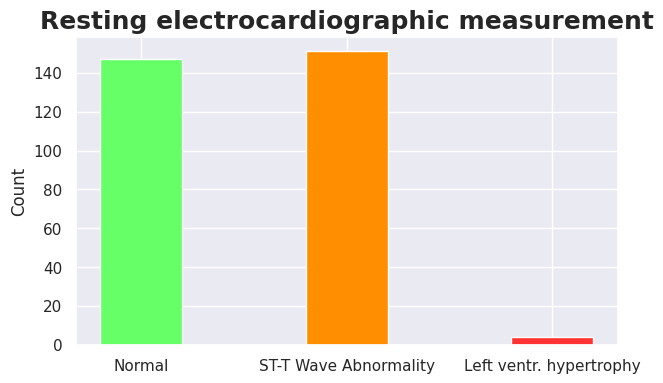

In [731]:
sn.set(style="darkgrid")

zero = len(data[data.rest_ecg == 0])
one = len(data[data.rest_ecg == 1])
two = len(data[data.rest_ecg == 2])

sizes = [zero,one,two]

# colors
colors = ['#66ff68','#ff8e00','#ff3333']



labels =['Normal','ST-T Wave Abnormality','Left ventr. hypertrophy']



plt.bar(labels, sizes, color = colors,
        width = 0.4)


plt.ylabel("Count")
plt.title("Resting electrocardiographic measurement", fontsize = 18, weight='bold')
plt.show()

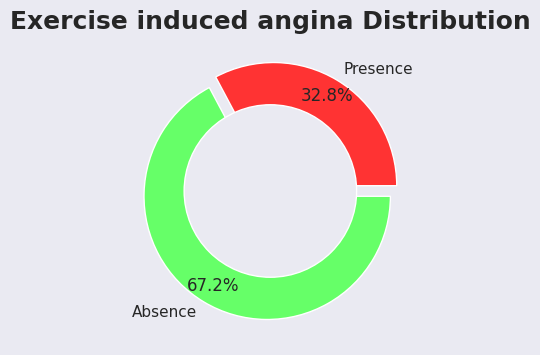

,Exang,Count
0,Presence,99
1,Absence,203


In [732]:
# Setting size in Chart based on
# given values
yes_ex = len(data[data.exercise_induced_angina == 1])
no_ex = len(data[data.exercise_induced_angina == 0])
sizes = [yes_ex, no_ex]

# Setting labels for items in Chart
labels = ['Presence', 'Absence']

# colors
colors = ['#ff3333','#66ff68']

# explosion
explode = (0.05, 0.05)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='#eaeaf2')
fig = plt.gcf()
fig.set_facecolor("#eaeaf2")
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Exercise induced angina Distribution', fontsize = 18, weight='bold')

# Displaying Chart
plt.show()


table_exang = pd.DataFrame(list(zip(labels,sizes)), columns=['Exang','Count'])
table_exang

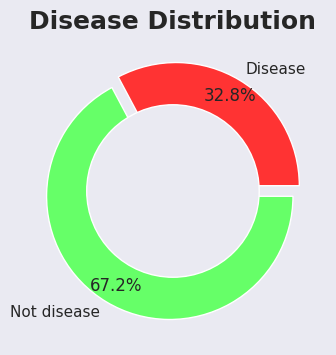

,,Count
0,Disease,99
1,Not disease,203


In [733]:
# Setting size in Chart based on
# given values
yes_disease = len(data[data.target == 1])
no_disease = len(data[data.target == 0])
sizes = [yes_ex, no_ex]

# Setting labels for items in Chart
labels = ['Disease', 'Not disease']

# colors
colors = ['#ff3333','#66ff68']
#plt.style.use("seaborn-v0_8-dark")

# explosion
explode = (0.05, 0.05)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='#eaeaf2')
fig = plt.gcf()
fig.set_facecolor("#eaeaf2")

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Disease Distribution', fontsize = 18, weight='bold')

# Displaying Chart
plt.show()


table_exang = pd.DataFrame(list(zip(labels,sizes)), columns=[' ','Count'])
table_exang

## Features Selection and Bivariate Analysis

###Correlation with target

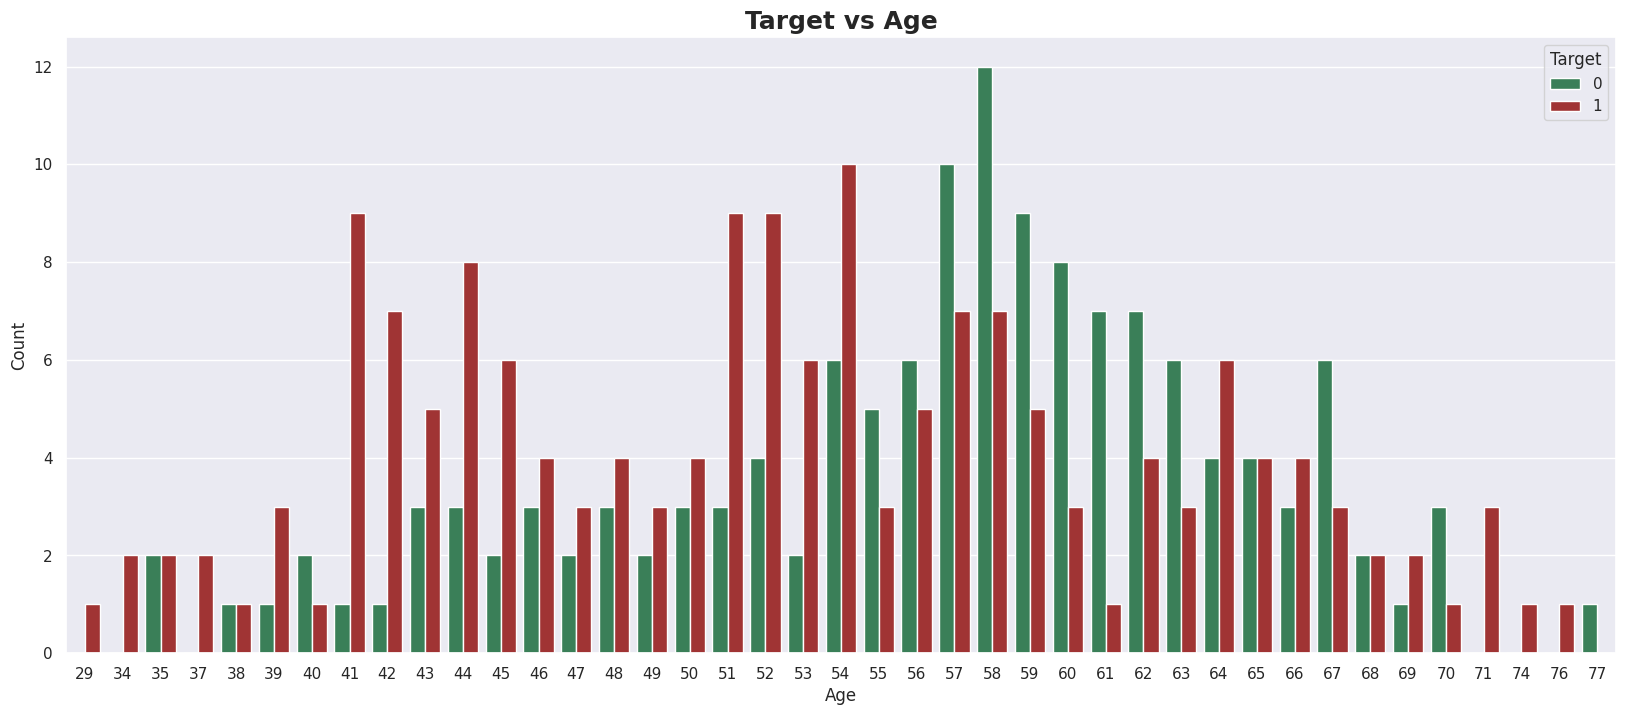

In [734]:
plt.figure(figsize=(20,8)) # Size of the figure
sn.set(style="darkgrid")

sn.countplot(data=data, x='age', hue = 'target', palette=["seagreen", "firebrick"])
plt.legend(loc='upper right', title="Target") # Location and title of legend
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target vs Age', fontsize = 18, weight='bold')
plt.show()

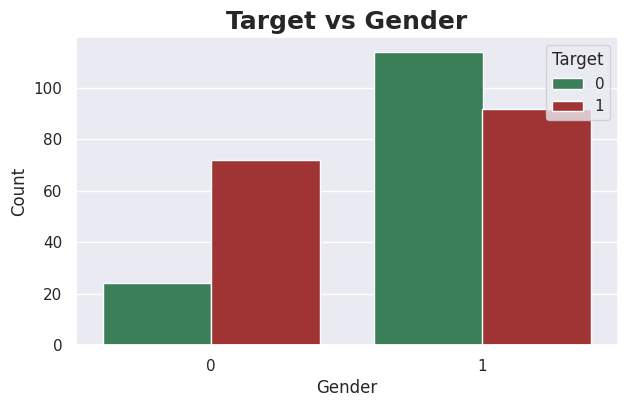

In [735]:
sn.set(style="darkgrid") # Background grid
plt.figure(figsize=(7,4)) # Size of the figure
sn.countplot(data=data, x='sex', hue = 'target', palette=["seagreen", "firebrick"])
plt.legend(loc='upper right', title="Target") # Location and title of legend
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Target vs Gender', fontsize = 18, weight='bold')
plt.show()

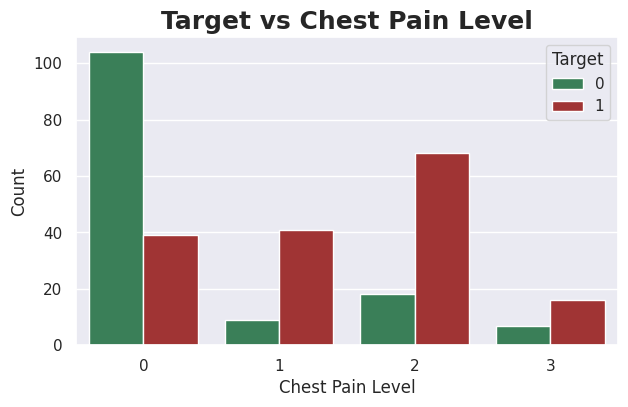

In [736]:
sn.set(style="darkgrid") # Background grid
plt.figure(figsize=(7,4)) # Size of the figure
sn.countplot(data=data, x='chest_pain', hue = 'target', palette=["seagreen", "firebrick"])
plt.legend(loc='upper right', title="Target") # Location and title of legend
plt.xlabel('Chest Pain Level')
plt.ylabel('Count')
plt.title('Target vs Chest Pain Level', fontsize = 18, weight='bold')
plt.show()

<ipython-input-737-963c63321dd1>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sn.swarmplot(data=data, x='target', y='max_heart_rate', palette=["seagreen", "firebrick"])


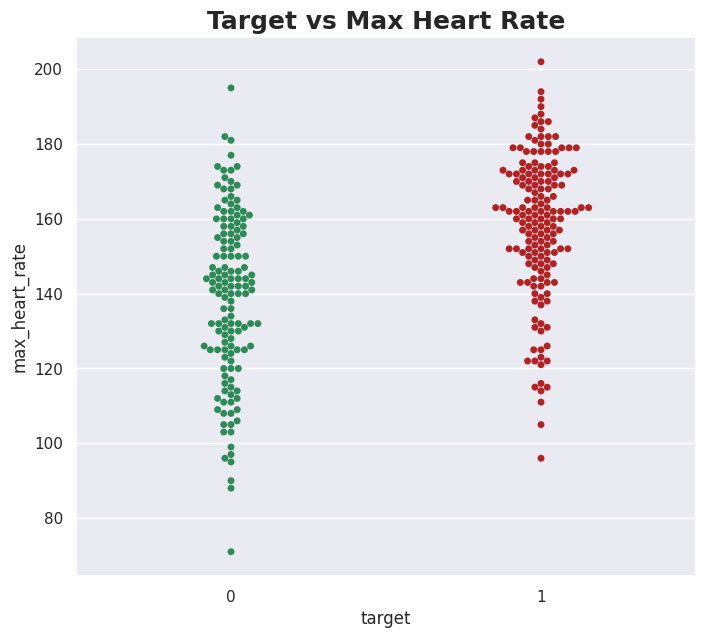

In [737]:
# Swarm plot to visualize the relationship between 'thalach'(max_heart_rate) and 'target'
sn.set(style="darkgrid") # Background grid
plt.rcParams['figure.figsize'] = (8, 7)
sn.swarmplot(data=data, x='target', y='max_heart_rate', palette=["seagreen", "firebrick"])
plt.title('Target vs Max Heart Rate', fontsize = 18, weight='bold')
plt.show()

###Correletion between features

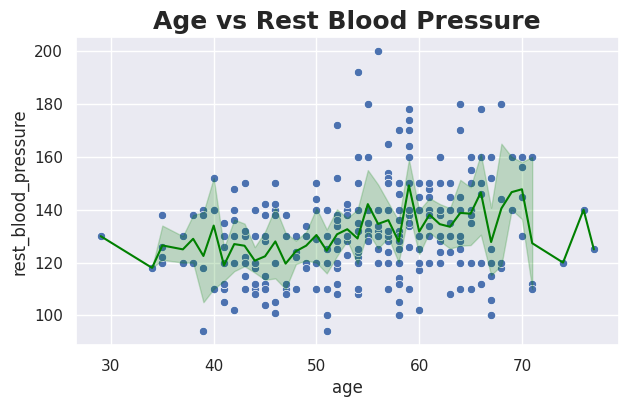

In [738]:
# Line plot to visualize the relationship between the features 'age' and 'trestbps', (rest blood pressure)
plt.figure(figsize=(7,4)) # Size of the figure
sn.set(style="darkgrid") # Background grid
sn.scatterplot(x="age", y="rest_blood_pressure", data=data)
sn.lineplot(x="age", y="rest_blood_pressure", data=data, color='green')
plt.title("Age vs Rest Blood Pressure", fontsize = 18, weight='bold')
plt.show()

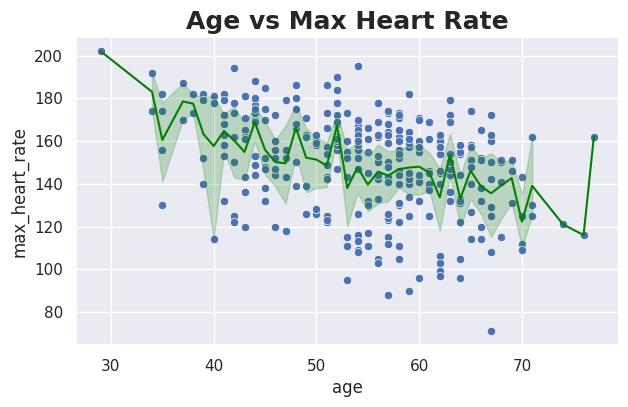

In [739]:
# Line plot to visualize the relationship between the features 'age' and 'trestbps' (max heart rate)
plt.figure(figsize=(7,4)) # Size of the figure
sn.set(style="darkgrid") # Background grid
sn.scatterplot(x="age", y="max_heart_rate", data=data)
sn.lineplot(x="age", y="max_heart_rate", data=data, color='green')
plt.title("Age vs Max Heart Rate", fontsize = 18, weight='bold')
plt.show()

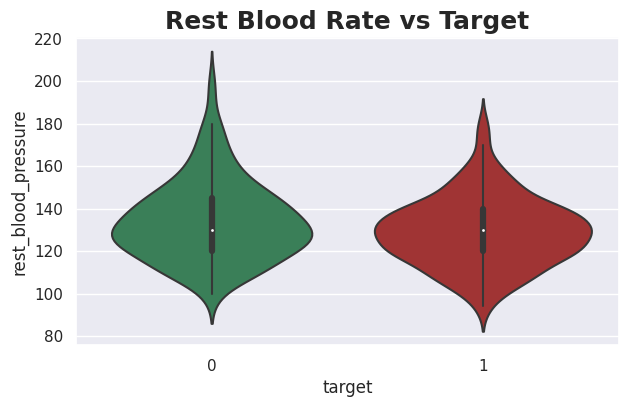

In [740]:
# Violin plot to visualize the relationship between 'trestbps'(rest_blood_pressure) and 'target'
sn.set(style="darkgrid") # Background grid
plt.rcParams['figure.figsize'] = (7, 4)
sn.violinplot(data=data, x='target', y='rest_blood_pressure', palette=["seagreen", "firebrick"])
plt.title("Rest Blood Rate vs Target", fontsize = 18, weight='bold')
plt.show()

According to WebMD, a high blood pressure is an indication of heart disease, the problem is that looking at the violin plot we cannot state this.

[source: https://www.webmd.com/hypertension-high-blood-pressure/hypertensive-heart-disease ]

#**Model building**

## Feature selection

### Correlation index (Heatmap)

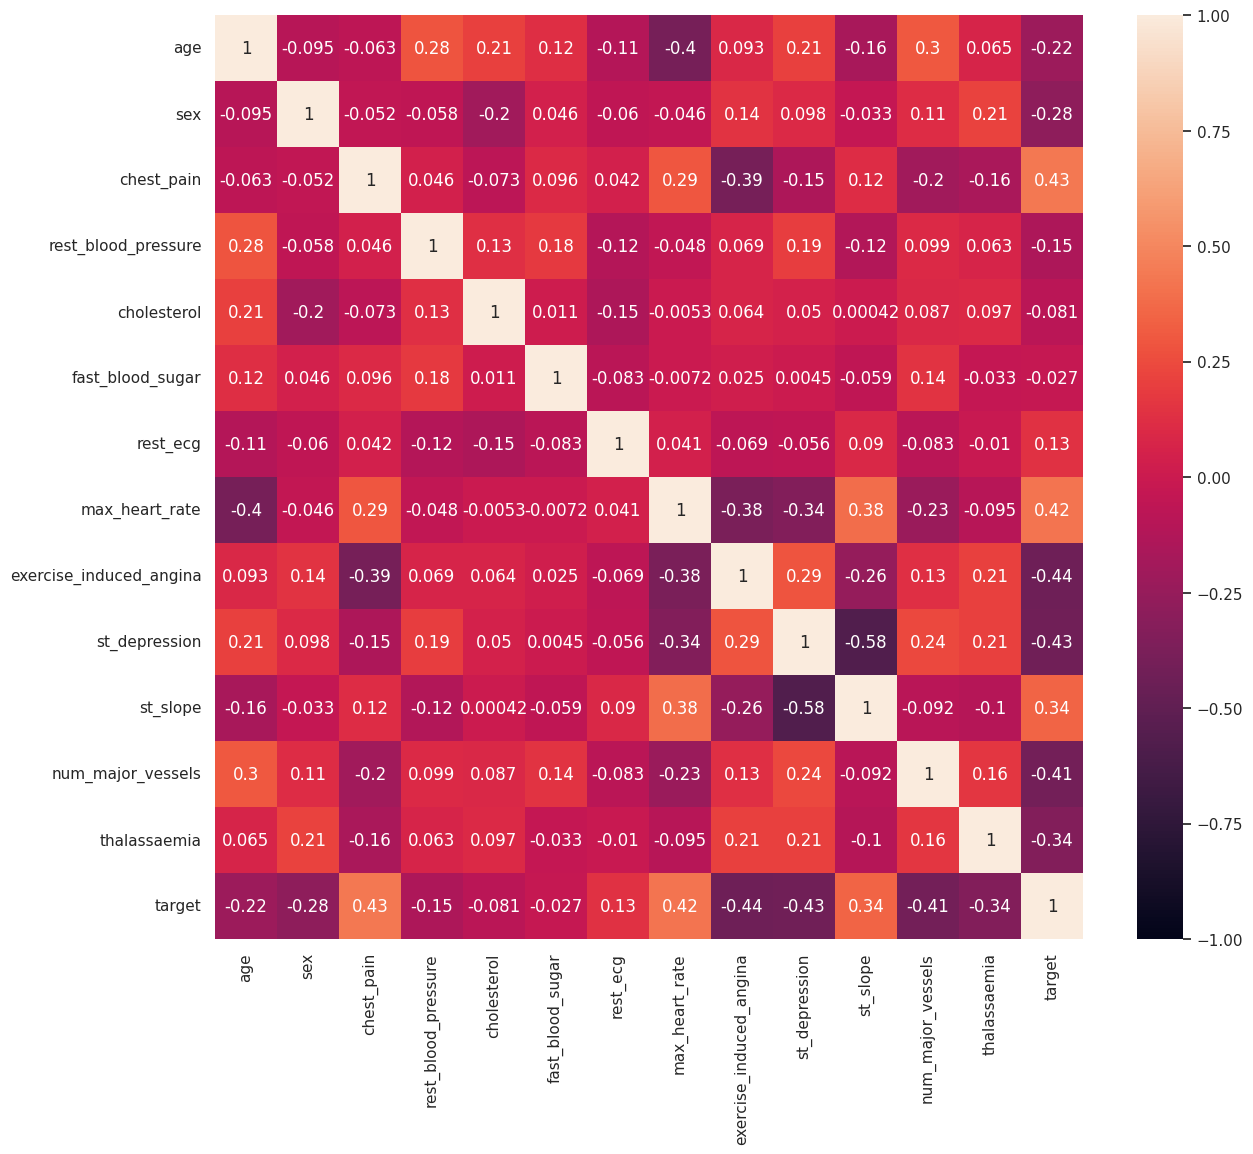

In [741]:
plt.figure(figsize=(14,12))
sn.heatmap(data.corr(), annot=True , vmin=-1)
plt.show()

### Extra Trees Classifier
The Extra Trees Classifier is similar to the Random Forest Classifier (the difference is in the way the tree is constructed). It's an ensemble learning technique useful for feature selection (it uses the Gini Index as a criterion for measuring correlation).

 fast_blood_sugar - 1.982229%
 rest_ecg - 3.539538%
 sex - 5.638410%
 cholesterol - 5.974379%
 rest_blood_pressure - 6.145757%
 st_slope - 6.581179%
 age - 6.967207%
 max_heart_rate - 8.939465%
 st_depression - 9.071878%
 exercise_induced_angina - 9.867437%
 thalassaemia - 10.616395%
 chest_pain - 12.263716%
 num_major_vessels - 12.412410%


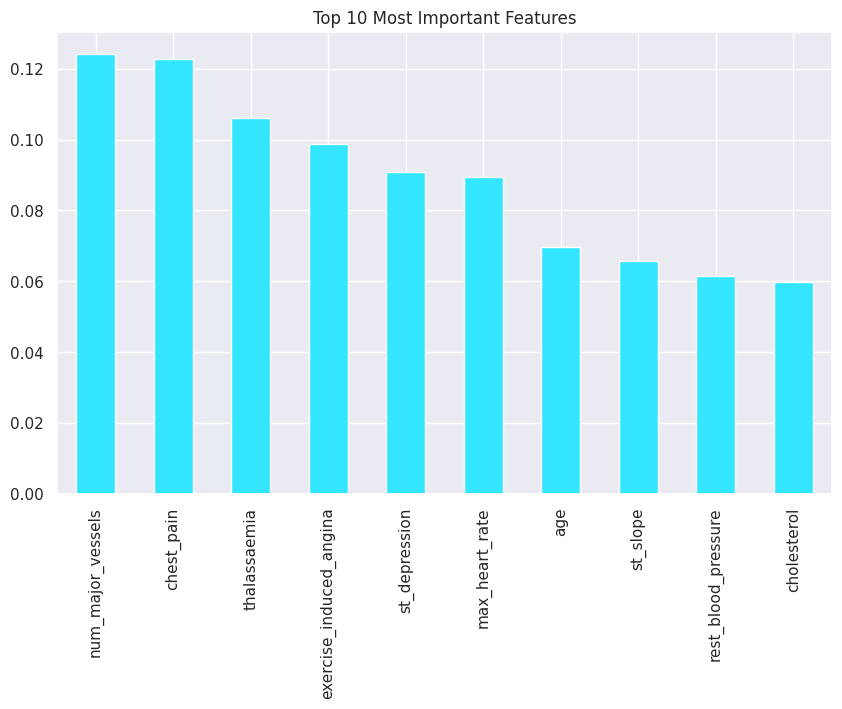

In [742]:
X = data.iloc[:,0:13]
Y = data.iloc[:,-1] # target column


# Building the model
extratrees = ExtraTreesClassifier(n_estimators=250 , random_state=0) # n_estimators = # of tree

# Training the model
extratrees.fit(X,Y)

#plot setting
sn.set(style="darkgrid")
plt.figure(figsize=(10,6))
plt.title("Top 10 Most Important Features")


#to get the first 10 important for plotting
feat_importances = pd.Series(extratrees.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar', color='#33e5ff')


# Computing the importance of each feature
importance = extratrees.feature_importances_

feature_labels=np.array(X.columns)

#sort by importance
feature_indexes_by_importance = importance.argsort()

#print (all feature) in % form, descend
for index in feature_indexes_by_importance:
    print(" {} - {:2f}%".format( feature_labels[index], (importance[index] * 100.0)))


plt.show()



## Dataset preparation

## Split dataset

In [743]:
y = data['target']
x = data.drop('target' ,axis=1)

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(x) , columns = x.columns)

X_train_origin , X_test_origin , Y_train , Y_test = train_test_split(X,y ,train_size=0.8) #80% train - 20% test

## Create new dataset with selected features

In [744]:
X_train = X_train_origin[['age', 'chest_pain', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassaemia']]
X_test = X_test_origin[['age', 'chest_pain', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassaemia']]


# **Model**


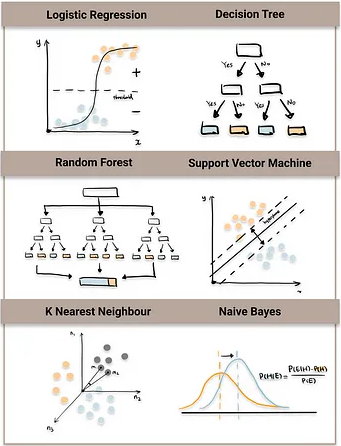

```
[ Image by Destin Gong on towardsdatascience.com ]
```


Selected Algorithms:
1. Logistic Regression (LR)
2. Decision Tree Classifier (DTC)
3. Random Forest Classifier (RFC)
4. Support Vector Machines (SVM)
5. K-Neighbors Classifier (KNN)
6. Naive Bayes (NB)

## K-fold Cross Validation
Cross-validation is a resampling technique that uses various data subsets to test and train a model on various iterations.

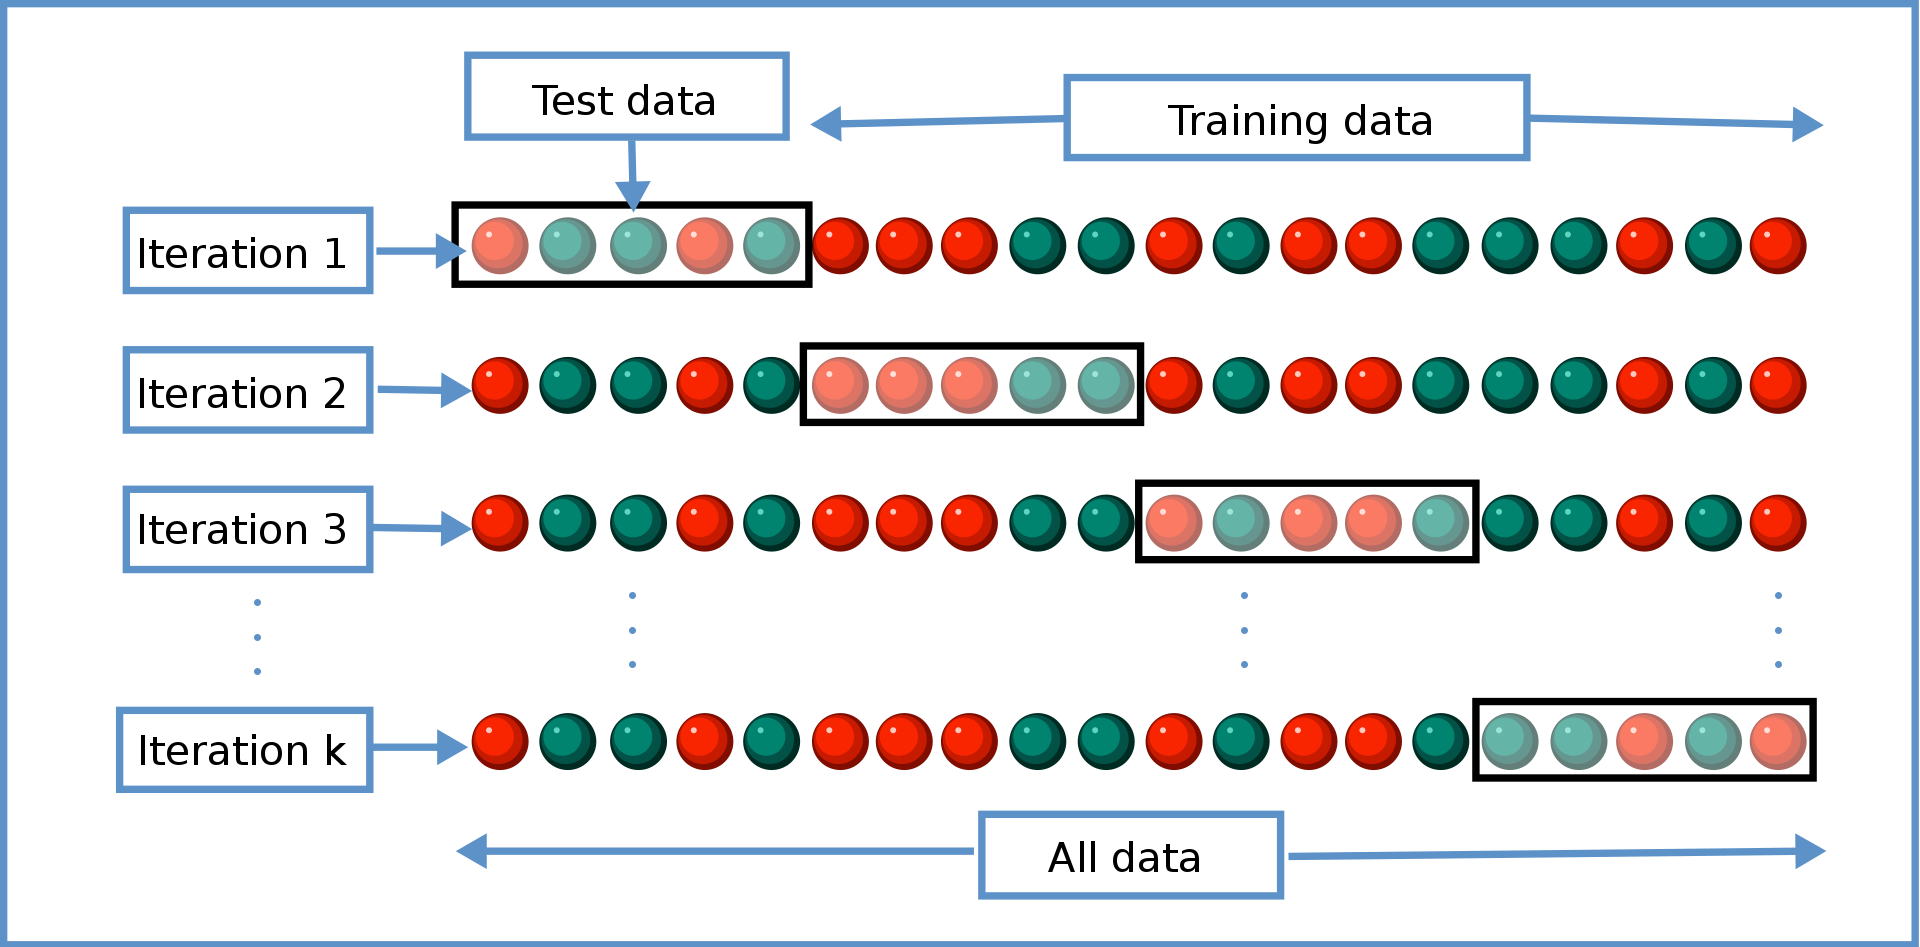
```
[ Image by Gufosowa on en.wikipedia.org ]
```

In [745]:
# Classification models
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=5000)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('SVM', SVC(gamma='scale')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

# evaluate accuracy for each model
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.816833 (0.084032)
DTC: 0.734667 (0.058137)
RFC: 0.779667 (0.079784)
SVM: 0.787833 (0.068973)
KNN: 0.804500 (0.065269)
NB: 0.804500 (0.079645)


##Tune Hyperparameters
The M.L. algorithms used so far refer to default parameters (using a grid approach), to improve performance and search for the optimal model one can use Tune Hyperparameters.

The parameter tune must be done on a single model at a time and consists of running the model several times going (varying the parameters) until the best one is found..

###Logistic Regression
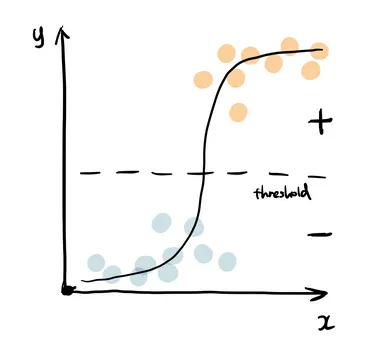

```
[ Image by Destin Gong on towardsdatascience.com ]
```


In [746]:
# Create the model
logreg = LogisticRegression(random_state=0, max_iter=5000, solver='liblinear')

#Parameters for grid search
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)
#print_model_paramater(grid.best_params_.items())

LogisticRegression_best_model = grid.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy:  0.8215986394557824
Model:  LogisticRegression(C=100, max_iter=5000, random_state=0, solver='liblinear')
Best parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


###Decision Tree
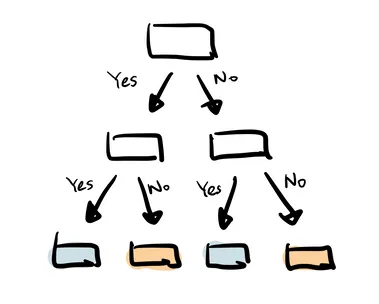

```
[ Image by Destin Gong on towardsdatascience.com ]
```

In [747]:
# Create the model
decision_tree = DecisionTreeClassifier(random_state=0)

#Parameters for grid search
max_depth = [3, 6, 10, 20, 30, 50]
max_features = [1.0, 0.5, 0.1]
min_samples_leaf = [3, 6, 9, 12, 15, 30]
min_samples_split = [2, 4, 8, 15, 25]

param_grid = dict(max_depth=max_depth,max_features=max_features,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)

grid = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)
#print_model_paramater(grid.best_params_.items())

DecisionTreeClassifier_best_model = grid.best_estimator_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Accuracy:  0.7843537414965986
Model:  DecisionTreeClassifier(max_depth=10, max_features=0.5, min_samples_leaf=3,
                       min_samples_split=8, random_state=0)
Best parameters:  {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 8}


###Random Forest
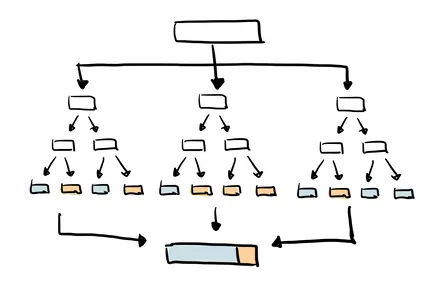

```
[ Image by Destin Gong on towardsdatascience.com ]
```

In [748]:
# Create the model
forest = RandomForestClassifier(random_state=0)

#Parameters for grid search
n_estimators = [200, 300, 500, 750]
max_features = ['sqrt', 'log2']
param_grid = dict(n_estimators=n_estimators,max_features=max_features)


grid = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)
#print_model_paramater(grid.best_params_.items())


RandomForestClassifier_best_model = grid.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Accuracy:  0.8008503401360544
Model:  RandomForestClassifier(n_estimators=300, random_state=0)
Best parameters:  {'max_features': 'sqrt', 'n_estimators': 300}


### Support Vector Machine (SVM)
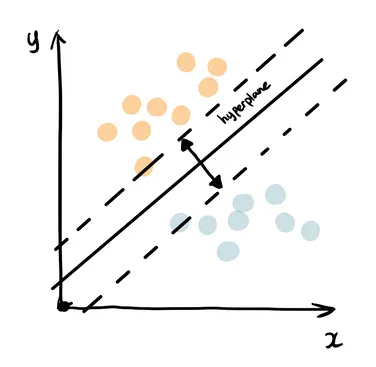

```
[ Image by Destin Gong on towardsdatascience.com ]
```

In [749]:
# Create the model
svm = SVC()

#Parameters for grid search
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
param_grid = dict(kernel=kernel,C=C,gamma=gamma)
grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)
#print_model_paramater(grid.best_params_.items())

SVC_best_model = grid.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy:  0.813265306122449
Model:  SVC(C=0.1, kernel='poly')
Best parameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}


###K-Nearest Neighbour (KNN)
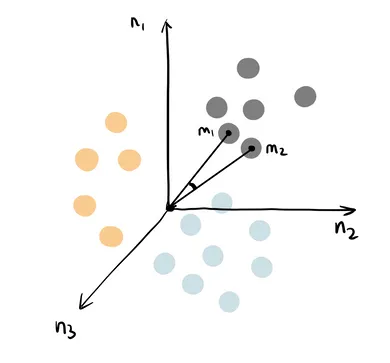

```
[ Image by Destin Gong on towardsdatascience.com ]
```

In [750]:
# Create the model
knn = KNeighborsClassifier()

#Parameters for grid search
n_neighbors = [1, 50]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)
#print_model_paramater(grid.best_params_.items())

KNeighborsClassifier_best_model = grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy:  0.8046768707482993
Model:  KNeighborsClassifier(metric='manhattan', n_neighbors=50, weights='distance')
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'distance'}


###Naive Bayes
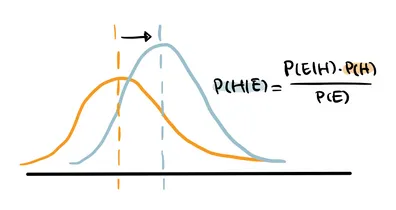
```
[ Image by Destin Gong on towardsdatascience.com ]
```

In [751]:
# Create the model
gaussNB = GaussianNB()

#Parameters for grid search
var_smoothing= np.logspace(0,-9, num=100)
param_grid = dict(var_smoothing=var_smoothing)
grid = GridSearchCV(estimator=gaussNB, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)
#print_model_paramater(grid.best_params_.items())

GaussianNB_best_model = grid.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy:  0.8214285714285714
Model:  GaussianNB(var_smoothing=0.012328467394420659)
Best parameters:  {'var_smoothing': 0.012328467394420659}


## Repeat k-Fold Cross Validation with  Tuned  Hyperparameters

In [752]:
# Classification models
models = []
models.append(('LR', LogisticRegression_best_model))
models.append(('DTC', DecisionTreeClassifier_best_model))
models.append(('RFC', RandomForestClassifier_best_model))
models.append(('SVM', SVC_best_model))
models.append(('KNN', KNeighborsClassifier_best_model))
models.append(('NB', GaussianNB_best_model))


# evaluate accuracy for each model
tune_results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    tune_results.append(cv_results)
    #names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.833500 (0.083584)
DTC: 0.743167 (0.066798)
RFC: 0.788000 (0.058060)
SVM: 0.821500 (0.046058)
KNN: 0.800333 (0.100393)
NB: 0.804500 (0.070388)


In [753]:
print("Default model\t\t\tTuned model\t\t\tImprovement")
improvement = []
final_score = []
default_parameter = []
best_ml={"model": "", "accuracy_score" : 0.0, "counter" : 0}
for i in range(len(names)):
  msg = "%s: %f (%f)" % (names[i], results[i].mean(), results[i].std())
  msg2 = "%f (%f)" % (tune_results[i].mean(), results[i].std())
  imp = tune_results[i].mean()-results[i].mean()
  improvement.append(imp)

  print("{} \t {}\t\t{}".format(msg,msg2,improvement[i]))

  if (tune_results[i].mean() > results[i].mean()): #there is an improvement
    final_score.append(tune_results[i].mean())
  else:
    final_score.append(results[i].mean())
    default_parameter.append(names[i])

  if best_ml.get("accuracy_score") < final_score[i]:
    best_ml.update({"model": names[i], "accuracy_score" : final_score[i], "counter" : i})

print("\n\nFor the following Model there will be use the default parameters: ",default_parameter)


Default model			Tuned model			Improvement
LR: 0.816833 (0.084032) 	 0.833500 (0.084032)		0.016666666666666607
DTC: 0.734667 (0.058137) 	 0.743167 (0.058137)		0.008500000000000063
RFC: 0.779667 (0.079784) 	 0.788000 (0.079784)		0.008333333333333304
SVM: 0.787833 (0.068973) 	 0.821500 (0.068973)		0.03366666666666662
KNN: 0.804500 (0.065269) 	 0.800333 (0.065269)		-0.004166666666666652
NB: 0.804500 (0.079645) 	 0.804500 (0.079645)		0.0


For the following Model there will be use the default parameters:  ['KNN', 'NB']


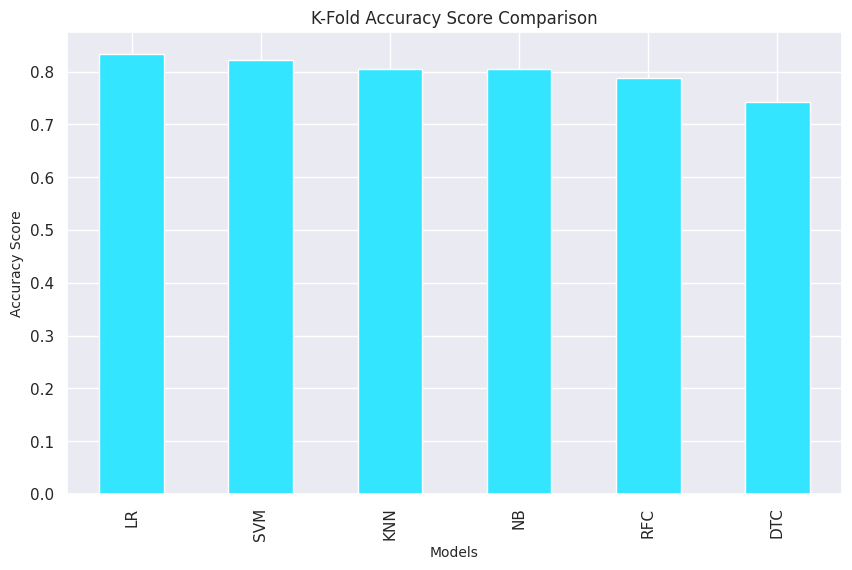

In [754]:

#plot setting
sn.set(style="darkgrid")
plt.figure(figsize=(10,6))
plt.title("K-Fold Accuracy Score Comparison")


feat_importances = pd.Series(final_score, index=names)
feat_importances.nlargest(6).plot(kind='bar', color='#33e5ff')

plt.xlabel('Models', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=10)
plt.show()



# **Best Machine Learning Model**

##Model

In [755]:
print("\nBest model is {} with an accuracy score of {}%\n\n".format(best_ml.get("model"),round(best_ml.get("accuracy_score"),4)*100))
best_model = models[best_ml.get("counter")][1]
best_model


Best model is LR with an accuracy score of 83.35000000000001%




LogisticRegression(C=100, max_iter=5000, random_state=0, solver='liblinear')

In [756]:
#ordered_list = feat_importances.nlargest(6).index
best_model_name = feat_importances.nlargest(1).index[0]

if best_model_name in default_parameter: # is a vanilla model
  best_model.fit(X_train,Y_train)

## Classification Report

In [757]:
y_pred = best_model.predict(X_test)
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.80      0.86      0.83        37

    accuracy                           0.79        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.79      0.79      0.78        61



## Accuracy, Prediction, Missclassification Rate

In [758]:
best_model_accuracy=accuracy_score(Y_test, y_pred)
print("Accuracy's {}: {}".format(best_ml.get("model"),best_model_accuracy))

Accuracy's LR: 0.7868852459016393


In [759]:
from sklearn.metrics import  precision_score


best_model_precision=precision_score(Y_test, y_pred)
print("Precision's {}: {}".format(best_ml.get("model"),best_model_precision))

Precision's LR: 0.8


In [760]:
print('Misclassification Rate:', 1 - best_model_accuracy)

Misclassification Rate: 0.21311475409836067


##Confusion Matrix, False Positive, False Negative

In [761]:
from sklearn.metrics import confusion_matrix

best_model_confusion_matrix = confusion_matrix(Y_test,y_pred)
print(best_model_confusion_matrix)

[[16  8]
 [ 5 32]]


In [762]:
# False Positive - Type I error
FP = best_model_confusion_matrix[0,1]

# False Negative - Type II error
FN = best_model_confusion_matrix[1,0]

#FP & FN Rate
FPR = FP/(best_model_confusion_matrix[0,0]+FP)
FNR = FN/(best_model_confusion_matrix[1,1]+FN)


print("There are ",FP," False Positive with rate of ",FPR)
print("There are ",FN," False Negative with rate of ",FNR)

There are  8  False Positive with rate of  0.3333333333333333
There are  5  False Negative with rate of  0.13513513513513514




---
#**Reduced Dataset**


Because these features were taken into consideration when developing the Digital Twin, it was decided to use this smaller dataset.

Since the Reduced Dataset features are the most easily to acquire given the context of the Use Case, they have been taken into consideration for the first prototype of the Digital Twin.

The new Dataset will be composed as follows:

| Features | Description | Possible values |
| --- | --- | --- |
| age |  |  |
| sex |  | 1 = Male, 0 = Female |
| chest_pain | chest pain type | 0 = Typical Angina 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic |
| max_heart_rate | maximum heart rate achieve |  |
| target | The patient has a heart disease | 0 = No, 1 = Yes |

##Dataset Preparation

In [763]:
X_train = X_train_origin[['age','sex','chest_pain','max_heart_rate']]

In [764]:
X_test = X_test_origin[['age','sex','chest_pain','max_heart_rate']]

In [765]:
#y = data_simplest['target']
#x = data_simplest.drop('target' ,axis=1)

#scaler = MinMaxScaler()

#X = pd.DataFrame(scaler.fit_transform(x) , columns = x.columns)

#X_train , X_test , Y_train , Y_test = train_test_split(X,y ,train_size=0.8) #80% train - 20% test

## Model

In [766]:
#k-fold cross validation

# Classification models
models_simplest = []
models_simplest.append(('LR', LogisticRegression(solver='lbfgs', max_iter=5000)))
models_simplest.append(('DTC', DecisionTreeClassifier()))
models_simplest.append(('RFC', RandomForestClassifier(n_estimators=100)))
models_simplest.append(('SVM', SVC(gamma='scale')))
models_simplest.append(('KNN', KNeighborsClassifier()))
models_simplest.append(('NB', GaussianNB()))

# evaluate accuracy for each model
results = []
names = []
for name, model in models_simplest:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.754333 (0.106469)
DTC: 0.680333 (0.089910)
RFC: 0.750500 (0.100979)
SVM: 0.766833 (0.115447)
KNN: 0.779500 (0.112294)
NB: 0.754500 (0.105021)


## Tune Hyperparameters

In [767]:
# Logistic Regression

# Create the model
logreg = LogisticRegression(random_state=0, max_iter=5000, solver='liblinear')

#Parameters for grid search
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)

LogisticRegression_simplest_model = grid.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy:  0.755017006802721
Model:  LogisticRegression(C=0.01, max_iter=5000, random_state=0, solver='liblinear')
Best parameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [768]:
#Decision Tree

# Create the model
decision_tree = DecisionTreeClassifier(random_state=0)

#Parameters for grid search
max_depth = [3, 6, 10, 20, 30, 50]
max_features = [1.0, 0.5, 0.1]
min_samples_leaf = [3, 6, 9, 12, 15, 30]
min_samples_split = [2, 4, 8, 15, 25]

param_grid = dict(max_depth=max_depth,max_features=max_features,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)

grid = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)

DecisionTreeClassifier_simplest_model = grid.best_estimator_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Accuracy:  0.7760204081632652
Model:  DecisionTreeClassifier(max_depth=6, max_features=0.1, min_samples_leaf=6,
                       min_samples_split=25, random_state=0)
Best parameters:  {'max_depth': 6, 'max_features': 0.1, 'min_samples_leaf': 6, 'min_samples_split': 25}


In [769]:
#Random Forest

# Create the model
forest = RandomForestClassifier(random_state=0)

#Parameters for grid search
n_estimators = [200, 300, 500, 750]
max_features = ['sqrt', 'log2']
param_grid = dict(n_estimators=n_estimators,max_features=max_features)


grid = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)


RandomForestClassifier_simplest_model = grid.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Accuracy:  0.7634353741496598
Model:  RandomForestClassifier(n_estimators=300, random_state=0)
Best parameters:  {'max_features': 'sqrt', 'n_estimators': 300}


In [770]:
#Support Vector Machine

# Create the model
svm = SVC()

#Parameters for grid search
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
param_grid = dict(kernel=kernel,C=C,gamma=gamma)
grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)

SVC_simplest_model = grid.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy:  0.7800170068027211
Model:  SVC(C=50)
Best parameters:  {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [771]:
#KNN

# Create the model
knn = KNeighborsClassifier()

#Parameters for grid search
n_neighbors = [1, 50]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)

KNeighborsClassifier_simplest_model = grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy:  0.7633503401360543
Model:  KNeighborsClassifier(metric='manhattan', n_neighbors=50, weights='distance')
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'distance'}


In [772]:
#Naive Bayes

# Create the model
gaussNB = GaussianNB()

#Parameters for grid search
var_smoothing= np.logspace(0,-9, num=100)
param_grid = dict(var_smoothing=var_smoothing)
grid = GridSearchCV(estimator=gaussNB, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)

GaussianNB_simplest_model = grid.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy:  0.7631802721088435
Model:  GaussianNB(var_smoothing=0.02848035868435802)
Best parameters:  {'var_smoothing': 0.02848035868435802}


## K-Fold Cross Validation with Tuned Hyperparameters

In [773]:
#k-fold cross validation with tuned Hyperparameters

# Classification models
models = []
models.append(('LR', LogisticRegression_simplest_model))
models.append(('DTC', DecisionTreeClassifier_simplest_model))
models.append(('RFC', RandomForestClassifier_simplest_model))
models.append(('SVM', SVC_simplest_model))
models.append(('KNN', KNeighborsClassifier_simplest_model))
models.append(('NB', GaussianNB_simplest_model))


# evaluate accuracy for each model
simplest_tune_results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    tune_results.append(cv_results)
    #names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.738167 (0.079995)
DTC: 0.742000 (0.098846)
RFC: 0.754667 (0.098256)
SVM: 0.783667 (0.091399)
KNN: 0.758667 (0.103928)
NB: 0.758500 (0.107032)


In [774]:
print("Default model\t\t\tTuned model\t\t\tImprovement")
improvement = []
simplest_final_score = []
default_parameter = []
simplest_best_ml={"model": "", "accuracy" : 0.0, "counter" : 0}
for i in range(len(names)):
  msg = "%s: %f (%f)" % (names[i], results[i].mean(), results[i].std())
  msg2 = "%f (%f)" % (tune_results[i].mean(), results[i].std())
  imp = tune_results[i].mean()-results[i].mean()
  improvement.append(imp)

  print("{} \t {}\t\t{}".format(msg,msg2,improvement[i]))

  if (tune_results[i].mean() > results[i].mean()): #there is an improvement
    simplest_final_score.append(tune_results[i].mean())
  else:
    simplest_final_score.append(results[i].mean())
    default_parameter.append(names[i])

  if simplest_best_ml.get("accuracy") < simplest_final_score[i]:
    simplest_best_ml.update({"model": names[i], "accuracy" : simplest_final_score[i], "counter" : i})

print("\n\nFor the following Model there will be use the default parameters: ",default_parameter)


Default model			Tuned model			Improvement
LR: 0.754333 (0.106469) 	 0.833500 (0.106469)		0.0791666666666665
DTC: 0.680333 (0.089910) 	 0.743167 (0.089910)		0.0628333333333333
RFC: 0.750500 (0.100979) 	 0.788000 (0.100979)		0.03750000000000009
SVM: 0.766833 (0.115447) 	 0.821500 (0.115447)		0.05466666666666664
KNN: 0.779500 (0.112294) 	 0.800333 (0.112294)		0.02083333333333326
NB: 0.754500 (0.105021) 	 0.804500 (0.105021)		0.050000000000000044


For the following Model there will be use the default parameters:  []


## Best Models

In [775]:
#ordered_list = feat_importances.nlargest(6).index
simplest_feat_importances = pd.Series(simplest_final_score, index=names)
simplest_best_model_ac = simplest_feat_importances.nlargest(1)
simplest_best_model_name = simplest_best_model_ac.index.values[0]

if simplest_best_model_name in default_parameter: # is a vanilla model
  simplest_best_model.fit(X_train,Y_train)

In [776]:
print("\nBest model is {} with an accuracy of {}%\n\n".format(simplest_best_model_name,round(simplest_best_model_ac.values[0]* 100,2) ))
simplest_best_model = models[simplest_best_ml.get("counter")][1]
simplest_best_model


Best model is LR with an accuracy of 83.35%




LogisticRegression(C=0.01, max_iter=5000, random_state=0, solver='liblinear')

## Classification Report

In [777]:
simplest_y_pred = simplest_best_model.predict(X_test)
print(classification_report(Y_test , simplest_y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.82      0.86      0.84        37

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



## Accuracy, Prediction, Missclassification Rate

In [778]:
simplest_best_model_accuracy=accuracy_score(Y_test, simplest_y_pred)
print("Accuracy's {}: {}".format(simplest_best_model_name,simplest_best_model_accuracy))

Accuracy's LR: 0.8032786885245902


In [779]:
from sklearn.metrics import  precision_score


simplest_best_model_precision=precision_score(Y_test, simplest_y_pred)
print("Precision's {}: {}".format(simplest_best_model_name,simplest_best_model_precision))

Precision's LR: 0.8205128205128205


In [780]:
print('Misclassification Rate:', 1 - simplest_best_model_accuracy)

Misclassification Rate: 0.19672131147540983


##Confusion Matrix, False Positive, False Negative

In [781]:
from sklearn.metrics import confusion_matrix

simplest_best_model_confusion_matrix = confusion_matrix(Y_test,simplest_y_pred)
print(simplest_best_model_confusion_matrix)

[[17  7]
 [ 5 32]]


In [782]:
# False Positive - Type I error
s_FP = simplest_best_model_confusion_matrix[0,1]

# False Negative - Type II error
s_FN = simplest_best_model_confusion_matrix[1,0]

#FP & FN Rate
s_FPR = s_FP/(simplest_best_model_confusion_matrix[0,0]+s_FP)
s_FNR = s_FN/(simplest_best_model_confusion_matrix[1,1]+s_FN)


print("There are ",s_FP," False Positive with rate of ",s_FPR)
print("There are ",s_FN," False Negative with rate of ",s_FNR)

There are  7  False Positive with rate of  0.2916666666666667
There are  5  False Negative with rate of  0.13513513513513514


# **Comparison between Full Dataset and Reduced Dataset**

## Model Difference

Full Dataset Model

In [783]:
best_model

LogisticRegression(C=100, max_iter=5000, random_state=0, solver='liblinear')

Reduced Dataset Model

In [784]:
simplest_best_model

LogisticRegression(C=0.01, max_iter=5000, random_state=0, solver='liblinear')

## Accuracy Score Comparison

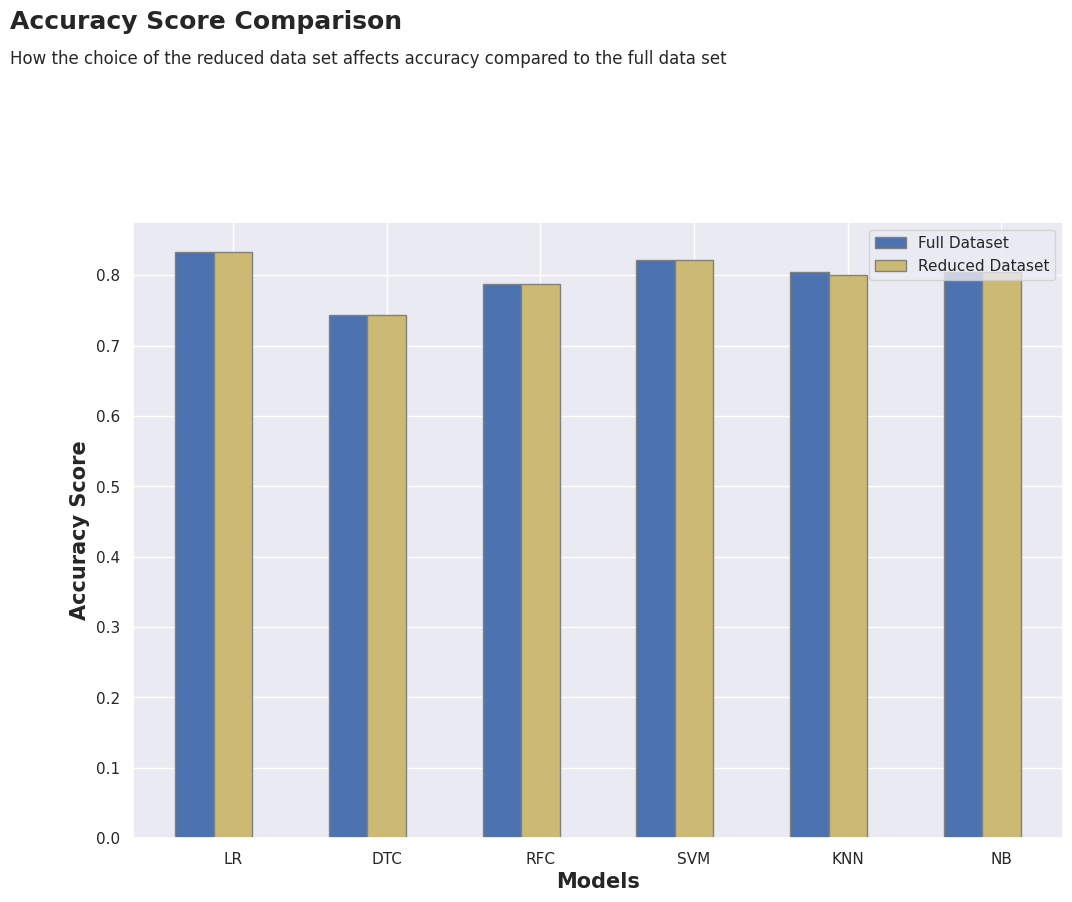

In [785]:
sn.set(style="darkgrid")
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))


# Set position of bar on X axis
br1 = np.arange(len(final_score))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, final_score, color ='b', width = barWidth,
        edgecolor ='grey', label ='Full Dataset')
plt.bar(br2, simplest_final_score, color ='y', width = barWidth,
        edgecolor ='grey', label ='Reduced Dataset')


# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(names))],
        names)

plt.legend()

# Adding Title of chart
plt.text(-1.2, 1.15, 'Accuracy Score Comparison', fontsize = 18, weight='bold')
plt.text(-1.2, 1.1, 'How the choice of the reduced data set affects accuracy compared to the full data set', fontsize = 12)

plt.show()

## Classification Report Comparison

In [786]:
y_pred_simplest = simplest_best_model.predict(X_test)

print("Classification Report: Reduced Dataset")
print(classification_report(Y_test , y_pred_simplest))

print("\nClassification Report: Full Dataset")
print(classification_report(Y_test , y_pred))

Classification Report: Reduced Dataset
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.82      0.86      0.84        37

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61


Classification Report: Full Dataset
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.80      0.86      0.83        37

    accuracy                           0.79        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.79      0.79      0.78        61



##Accuracy, Prediction, Missclassification Rate

<ipython-input-802-167940710592>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


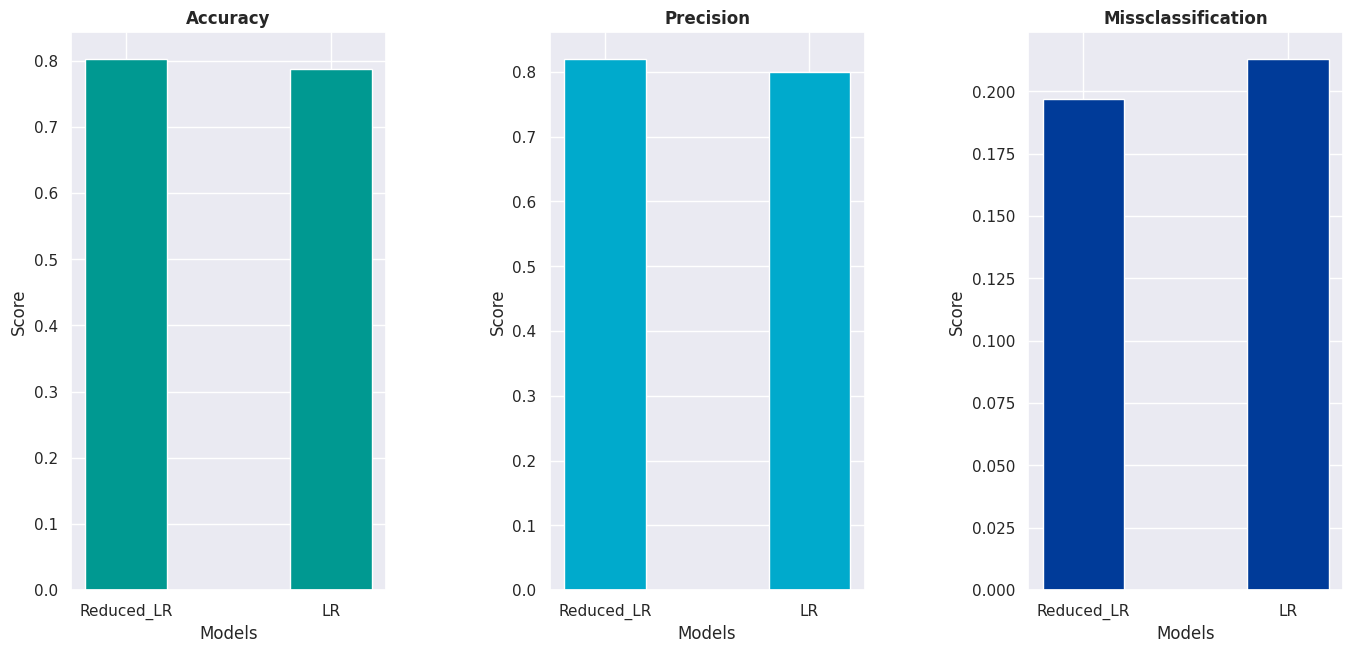



Models			Accuracy			Precision			Missclassification
Reduced_LR:		0.8032786885245902		0.8205128205128205		0.19672131147540983
LR:			0.7868852459016393		0.8				0.21311475409836067


In [802]:
name_models = ["Reduced_"+simplest_best_model_name, best_model_name]
accuracy_models = [simplest_best_model_accuracy,best_model_accuracy]
precision_models = [simplest_best_model_precision,best_model_precision]
miss_classification_models = [1-simplest_best_model_accuracy,1-best_model_accuracy]



sn.set(style="darkgrid")

fig = plt.subplots(figsize =(15, 8))


plt.subplot(1, 3, 1)
plt.bar(name_models, accuracy_models, color = "#009991",
        width = 0.4)
plt.title("Accuracy", weight='bold')

plt.ylabel("Score")
plt.xlabel("Models")

plt.subplot(1, 3, 2)
plt.bar(name_models, precision_models, color = "#00aacc",
        width = 0.4)

plt.ylabel("Score")
plt.xlabel("Models")
plt.title("Precision", weight='bold')

plt.subplot(1, 3, 3)
plt.bar(name_models, miss_classification_models, color = "#003b99",
        width = 0.4)

plt.ylabel("Score")
plt.xlabel("Models")
plt.title("Missclassification", weight='bold')


plt.tight_layout(pad=5.0)
plt.show()

print("\n\nModels\t\t\tAccuracy\t\t\tPrecision\t\t\tMissclassification")
print("{}:\t\t{}\t\t{}\t\t{}".format(name_models[0],accuracy_models[0],precision_models[0],miss_classification_models[0]))
print("{}:\t\t\t{}\t\t{}\t\t\t\t{}".format(name_models[1],accuracy_models[1],precision_models[1],miss_classification_models[1]))

##Confusion Matrix, False Positive, False Negative

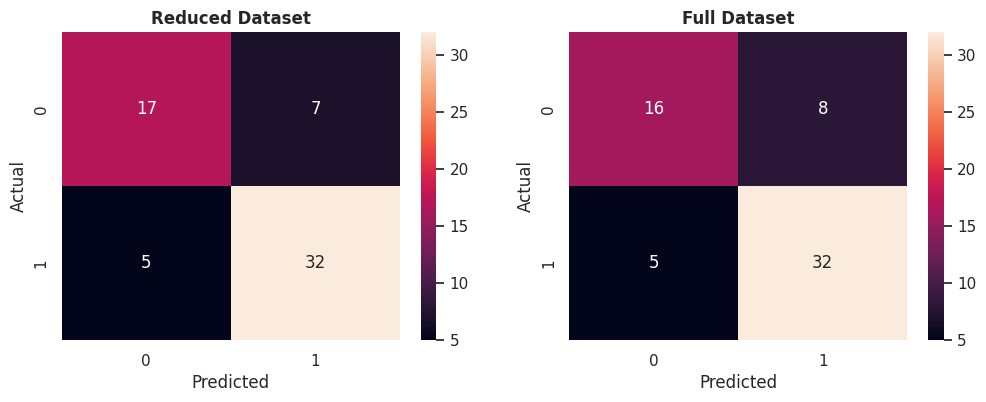

In [788]:
sn.set(style="darkgrid")

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 2)
sn.heatmap(best_model_confusion_matrix, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Full Dataset",weight='bold')

plt.subplot(1, 2, 1)
sn.heatmap(simplest_best_model_confusion_matrix, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Reduced Dataset",weight='bold')


plt.show()


Fale Positive end False Negative

In [789]:
print("Full Dataset")
print("There are ",FP," False Positive with rate of ",round(FPR*100,2),"%")
print("There are ",FN," False Negative with rate of ",round(FNR*100,2),"%")

print("\nReduced Dataset")
print("There are ",s_FP," False Positive with rate of ",round(s_FPR*100,2),"%")
print("There are ",s_FN," False Negative with rate of ",round(s_FNR*100,2),"%")

Full Dataset
There are  8  False Positive with rate of  33.33 %
There are  5  False Negative with rate of  13.51 %

Reduced Dataset
There are  7  False Positive with rate of  29.17 %
There are  5  False Negative with rate of  13.51 %


# **Comparing the Impact of Duplicate Observations in the Machine Learning Model**

This section will discuss the impact of using the initial dataset containing duplicate data.

In another document, the same Machine Learning algorithms done here have been developed, this is the outcome:


In [790]:
print(classification_report_duplicated_data)

              precision  recall  f1_score  support
index                                             
0                   1.0     1.0       1.0       96
1                   1.0     1.0       1.0      109
accuracy            NaN     NaN       1.0      205
macro_avg           1.0     1.0       1.0      205
weighted_avg        1.0     1.0       1.0      205


The impact of removing duplicate observations is great, we went from having an accuracy of approx. 99% (with duplicates) to having an accuracy of 84% (without duplicates).

In [791]:
print("Final score: ",final_score_duplicated_data)

Final score:  [0.8329268292682928, 0.9853658536585366, 0.9878048780487806, 0.9365853658536587, 0.9890243902439024, 0.8073170731707318]


## Comparing Final Score Accuracy

In [792]:
best_final_score=[]
for i in range(len(final_score)):
  if final_score[i] < simplest_final_score[i]:
    best_final_score.append(simplest_final_score[i])
  else:
    best_final_score.append(final_score[i])

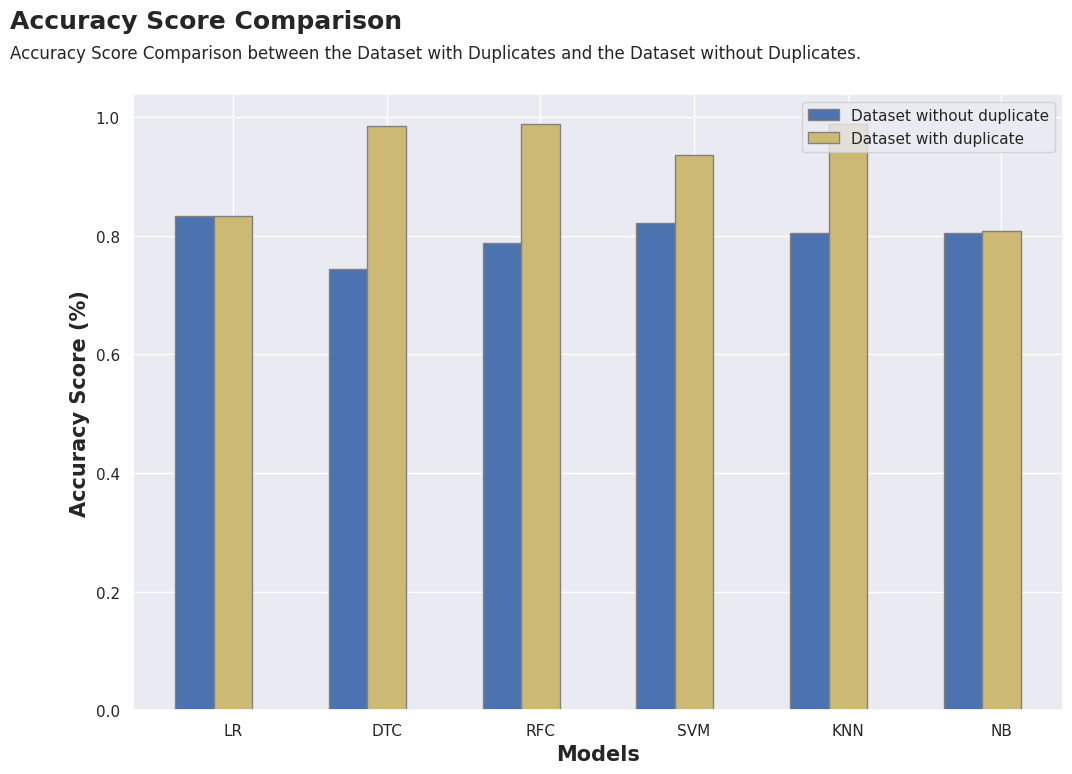

In [793]:
sn.set(style="darkgrid")
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))


# Set position of bar on X axis
br1 = np.arange(len(final_score))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, best_final_score, color ='b', width = barWidth,
        edgecolor ='grey', label ='Dataset without duplicate')
plt.bar(br2, final_score_duplicated_data, color ='y', width = barWidth,
        edgecolor ='grey', label ='Dataset with duplicate')



# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy Score (%)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(names))],
        names)

plt.legend()

# Adding Title of chart
plt.text(-1.2, 1.15, 'Accuracy Score Comparison', fontsize = 18, weight='bold')
plt.text(-1.2, 1.1, 'Accuracy Score Comparison between the Dataset with Duplicates and the Dataset without Duplicates.', fontsize = 12)

plt.show()

<ipython-input-794-60d10527feb1>:53: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('b')
<ipython-input-794-60d10527feb1>:54: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('y')


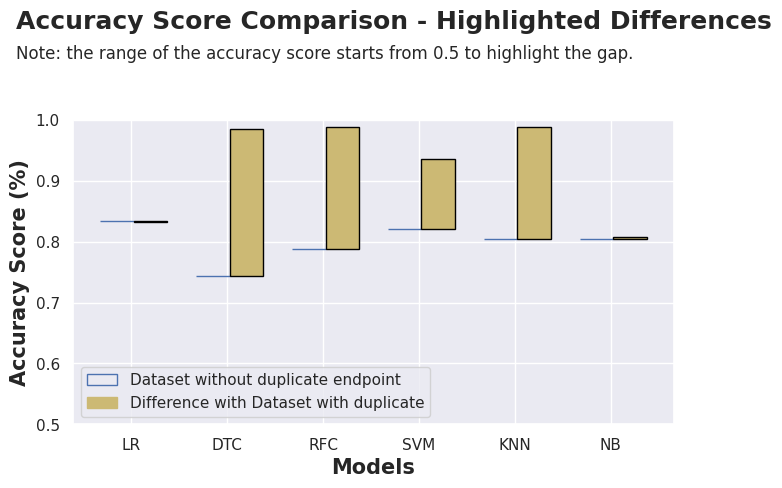

In [794]:
def hat_graph(ax, xlabels, values, group_labels):
    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
        for height, rect in zip(heights, rects):
            arrowprops = dict(facecolor ='y',
                               shrink = 0.05)

            ax.annotate('w/o dupl.',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom',)
                        #arrowprops = arrowprops)

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]

    for i, (heights, group_label) in enumerate(zip(values, group_labels)):

          if i != 0:
            list_color = []
            for j in range(len(heights)):
              if (heights[j] - heights0[j]) < 0:
                list_color.append('g')
              else:
                list_color.append('r')
            style = {'edgecolor': 'black', 'color' : 'y'}

          else:
            style = {'fill': False, 'edgecolor': 'b'}

          rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                        width, bottom=heights0, label=group_label, **style)



fig, ax = plt.subplots()
hat_graph(ax, names, [best_final_score, final_score_duplicated_data], ['Dataset without duplicate endpoint', 'Difference with Dataset with duplicate'])

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy Score (%)', fontweight ='bold', fontsize = 15)
ax.set_ylim(0.5, 1)

ax.legend()

#ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('b')
leg.legendHandles[1].set_color('y')
fig.tight_layout()

# Adding Title of chart
plt.text(-1.2, 1.15, 'Accuracy Score Comparison - Highlighted Differences', fontsize = 18, weight='bold')
plt.text(-1.2, 1.1, 'Note: the range of the accuracy score starts from 0.5 to highlight the gap.', fontsize = 12)
plt.show()

As can be seen, the model containing the duplicate data improves accuracy. This is because it fall into the case of overfitting: the model fits well only on this dataset, and if we were to consider different data the accuracy would decrease drastically.

This is why the model referring to the dataset without duplication is better, since in the other dataset the improvement does not correspond to reality.

# **Conclusion**
- The difference found between the Reduced Dataset and the Full Dataset is slight.
- The accuracy percentage achieved by the model still has potential for improvement, although it is still good. This is because the original dataset had a limited amount of observations.
- The removal of duplicate observations had a huge impact on the model, improving the final model.

# **References**

WebMD: https://www.webmd.com/hypertension-high-blood-pressure/hypertensive-heart-disease

Image by Destin Gong on towardsdatascience.com: https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

Image by Gufosowa on en.wikipedia.org: https://en.wikipedia.org/wiki/Cross-validation_(statistics)#/media/File:K-fold_cross_validation_EN.svg

# **Cite**
```
Dataset Cite:
Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert.
(1988).
Heart Disease.
UCI Machine Learning Repository.
https://doi.org/10.24432/C52P4X.

```